<a href="https://colab.research.google.com/github/ariel55/summerdata_visuchallenge/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [481]:
#IMPORTS
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
#!pip install folium
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [482]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Entrenamieto_ECI_2020.csv")
_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test_TP2_Datos_2020-2C.csv")


#Quito oportunidaddes que pienso no sirven
df.drop(df[df.Stage =="Negotiation"].index, inplace = True)
df.drop(df[df.Stage =="Proposal"].index, inplace = True)
df.drop(df[df.Stage =="Qualification"].index, inplace = True)


In [483]:
pd.set_option('max_columns', 3000)
pd.set_option('max_rows', 30)

In [484]:
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [485]:
#DEL TP1

In [486]:
def dejar_solo_cifras(txt):
  return "".join(c for c in txt if c.isdigit())

df["Last_Modified_By"]= df["Last_Modified_By"].map(dejar_solo_cifras)
df["Last_Modified_By"]= df["Last_Modified_By"].astype(int)

_data["Last_Modified_By"]= _data["Last_Modified_By"].map(dejar_solo_cifras)
_data["Last_Modified_By"]= _data["Last_Modified_By"].astype(int)


In [487]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
                                       ...   
Total_Amount                          float64
Total_Taxable_Amount_Currency          object
Total_Taxable_Amount                  float64
Stage                                  object
Prod_Category_A                        object
Length: 52, dtype: object

In [488]:
df['Month'] = pd.DatetimeIndex(df['Month']).month
_data['Month'] = pd.DatetimeIndex(_data['Month']).month

In [489]:
df["is_B4"] = df["Bureaucratic_Code"]=="Bureaucratic_Code_4"
_data["is_B4"]=_data["Bureaucratic_Code"]=="Bureaucratic_Code_4"

In [490]:
df["is_B3"]=df["Bureaucratic_Code"]=="Bureaucratic_Code_3"
_data["is_B3"]=_data["Bureaucratic_Code"]=="Bureaucratic_Code_3"

In [491]:
df["is_B6"]=df["Bureaucratic_Code"]=="Bureaucratic_Code_6"
_data["is_B6"]=_data["Bureaucratic_Code"]=="Bureaucratic_Code_6"

In [492]:
df["is_OT_12"]=df["Opportunity_Type"]=="Opportunity_Type_12"
_data["is_OT_12"]=_data["Opportunity_Type"]=="Opportunity_Type_12"

In [493]:
df["is_OT_19"]=df["Opportunity_Type"]=="Opportunity_Type_19"
_data["is_OT_19"]=_data["Opportunity_Type"]=="Opportunity_Type_19"

In [494]:
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'], format='%m/%d/%Y', errors='coerce')
df['Planned_Delivery_End_Date']   = pd.to_datetime(df['Planned_Delivery_End_Date'], format='%m/%d/%Y', errors='coerce')
df['Periodo'] = df['Planned_Delivery_End_Date'] - df['Planned_Delivery_Start_Date']
df['Periodo'] = df['Periodo'] / pd.Timedelta(1, unit='d')
df["Periodo"] = df["Periodo"] >160
df.drop(columns=['Planned_Delivery_Start_Date','Planned_Delivery_End_Date'], axis=1,inplace = True)

In [495]:
_data['Planned_Delivery_Start_Date'] = pd.to_datetime(_data['Planned_Delivery_Start_Date'], format='%m/%d/%Y', errors='coerce')
_data['Planned_Delivery_End_Date']   = pd.to_datetime(_data['Planned_Delivery_End_Date'], format='%m/%d/%Y', errors='coerce')
_data['Periodo'] = _data['Planned_Delivery_End_Date'] - _data['Planned_Delivery_Start_Date']
_data['Periodo'] = _data['Periodo'] / pd.Timedelta(1, unit='d')
_data["Periodo"] = _data["Periodo"] >160
_data.drop(columns=['Planned_Delivery_Start_Date','Planned_Delivery_End_Date'], axis=1,inplace = True)

In [496]:
#QUITO COLUMNAS

In [497]:
_data.drop(columns=["Product_Category_B","Price","ASP_(converted)_Currency","ASP_Currency",'Submitted_for_Approval',\
                    'Last_Activity','Actual_Delivery_Date','Prod_Category_A',"Product_Type","Size","Brand",\
                    
                    "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved","Account_Created_Date"\
                   ,"Source ","Account_Name","Opportunity_Name","Sales_Contract_No","Opportunity_Owner",\
                    
                   "Total_Taxable_Amount_Currency","Total_Amount_Currency","Currency","Last_Modified_Date"], axis=1,inplace = True)
df.drop(columns=["Product_Category_B","Price","ASP_(converted)_Currency","ASP_Currency",'Submitted_for_Approval',\
                    'Last_Activity','Actual_Delivery_Date','Prod_Category_A',"Product_Type","Size","Brand",\
                 
                    "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved","Account_Created_Date"\
                   ,"Source ","Account_Name","Opportunity_Name","Sales_Contract_No","Opportunity_Owner",\
                 
                   "Total_Taxable_Amount_Currency","Total_Amount_Currency","Currency","Last_Modified_Date"], axis=1,inplace = True)


#,"Account_Owner","Account_Type"

In [498]:
df

,ID,Region,Territory,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Opportunity_ID,Account_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_By,Product_Family,Product_Name,ASP,ASP_(converted),Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,Stage,is_B4,is_B3,is_B6,is_OT_12,is_OT_19,Periodo
0,27761,EMEA,None,1,1,Bureaucratic_Code_4,Netherlands,0,Person_Name_51,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/30/2016,18,Product_Family_77,Product_Name_99,0.5200,0.58817,5,Q2,2016,10,5272800.00,5272800.0,Closed Lost,True,False,False,False,False,False
1,27760,EMEA,None,0,0,Bureaucratic_Code_4,Netherlands,1,Person_Name_51,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/20/2016,20,Product_Family_77,Product_Name_100,0.5300,0.59948,1,Q1,2016,0,48230.00,48230.0,Closed Won,True,False,False,False,False,False
2,27446,Americas,NW America,0,0,Bureaucratic_Code_4,United States,2,Person_Name_64,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,9/30/2016,8,Product_Family_81,Product_Name_91,0.4800,0.48000,1,Q1,2016,0,83865.60,83865.6,Closed Won,True,False,False,False,False,False
3,16808,Americas,NW America,1,0,Bureaucratic_Code_5,United States,3,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,NaT,8,Product_Family_209,Product_Name_432,0.5300,0.53000,2,Q1,2018,14,7421881.50,7421881.5,Closed Lost,False,False,False,False,True,False
4,16805,Americas,NW America,1,0,Bureaucratic_Code_5,United States,4,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,6/2/2017,8,Product_Family_209,Product_Name_432,0.5300,0.53000,2,Q1,2018,25,13357192.50,13357192.5,Closed Lost,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,Bureaucratic_Code_4,Austria,12801,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,NaT,13,Product_Family_85,Product_Name_111,0.5200,0.58817,3,Q1,2016,0,103350.00,299715.0,Closed Won,True,False,False,False,False,False
16943,8786,EMEA,Austria,1,1,Bureaucratic_Code_4,Austria,12801,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,NaT,13,Product_Family_85,Product_Name_111,0.5200,0.58817,4,Q2,2016,0,93015.00,299715.0,Closed Won,True,False,False,False,False,False
16944,8792,EMEA,Austria,1,1,Bureaucratic_Code_4,Austria,12801,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,NaT,13,Product_Family_85,Product_Name_111,0.5200,0.58817,3,Q1,2016,0,103350.00,299715.0,Closed Won,True,False,False,False,False,False
16945,28561,Americas,NE America,1,1,Bureaucratic_Code_4,United States,12802,Person_Name_3,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/5/2015,2/29/2016,3,Product_Family_158,Product_Name_287,0.6375,0.63750,4,Q2,2016,4,2346796.88,0.0,Closed Lost,True,False,False,False,False,False


In [499]:
_data

,ID,Region,Territory,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Opportunity_ID,Account_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_By,Product_Family,Product_Name,ASP,ASP_(converted),Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,is_B4,is_B3,is_B6,is_OT_12,is_OT_19,Periodo
0,6140,EMEA,Germany,1,1,Bureaucratic_Code_4,Germany,10689,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,4/30/2019,13,Product_Family_171,Product_Name_332,0.325,0.36761,5,Q2,2019,0,162240.0,367419.0,True,False,False,False,False,False
1,6146,EMEA,Germany,1,1,Bureaucratic_Code_4,Germany,10689,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,4/30/2019,13,Product_Family_167,Product_Name_315,0.320,0.36195,5,Q2,2019,0,78624.0,367419.0,True,False,False,False,False,False
2,6151,EMEA,Germany,1,1,Bureaucratic_Code_4,Germany,10689,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,4/30/2019,13,Product_Family_140,Product_Name_241,0.275,0.31105,5,Q2,2019,0,126555.0,367419.0,True,False,False,False,False,False
3,6118,EMEA,Germany,1,1,Bureaucratic_Code_4,Germany,10690,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,4/30/2019,13,Product_Family_171,Product_Name_328,0.325,0.36761,6,Q2,2019,1,243360.0,757783.5,True,False,False,False,False,False
4,6124,EMEA,Germany,1,1,Bureaucratic_Code_4,Germany,10690,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,4/30/2019,13,Product_Family_167,Product_Name_315,0.320,0.36195,6,Q2,2019,0,157248.0,757783.5,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,0,0,Bureaucratic_Code_4,South Africa,12364,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,4/26/2019,5/24/2019,13,Product_Family_213,Product_Name_447,0.300,0.30000,5,Q2,2019,0,124740.0,147750.0,True,False,False,False,False,False
2547,15218,Americas,SE America,0,0,Bureaucratic_Code_4,United States,12365,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,5/24/2019,38,Product_Family_221,Product_Name_477,0.410,0.41000,10,Q4,2019,0,45054.9,45054.9,True,False,False,False,False,False
2548,15224,Americas,SE America,1,1,Bureaucratic_Code_4,United States,12366,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,5/24/2019,38,Product_Family_221,Product_Name_477,0.410,0.41000,10,Q4,2019,0,100122.0,100122.0,True,False,False,False,False,False
2549,7286,Americas,NE America,0,0,Bureaucratic_Code_4,United States,12367,Person_Name_9,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,4/26/2019,5/26/2019,9,Product_Family_156,Product_Name_281,0.500,0.50000,8,Q3,2019,0,143220.0,143220.0,True,False,False,False,False,False


# Encoders


In [500]:
#Quito EL Stage y lo groupeo por Opp_ID, lo uso despues
y = df[["Opportunity_ID",'Stage']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Label_Stage"] = le.fit_transform(df["Stage"])
df

,ID,Region,Territory,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Opportunity_ID,Account_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_By,Product_Family,Product_Name,ASP,ASP_(converted),Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,Stage,is_B4,is_B3,is_B6,is_OT_12,is_OT_19,Periodo,Label_Stage
0,27761,EMEA,None,1,1,Bureaucratic_Code_4,Netherlands,0,Person_Name_51,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/30/2016,18,Product_Family_77,Product_Name_99,0.5200,0.58817,5,Q2,2016,10,5272800.00,5272800.0,Closed Lost,True,False,False,False,False,False,0
1,27760,EMEA,None,0,0,Bureaucratic_Code_4,Netherlands,1,Person_Name_51,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/20/2016,20,Product_Family_77,Product_Name_100,0.5300,0.59948,1,Q1,2016,0,48230.00,48230.0,Closed Won,True,False,False,False,False,False,1
2,27446,Americas,NW America,0,0,Bureaucratic_Code_4,United States,2,Person_Name_64,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,9/30/2016,8,Product_Family_81,Product_Name_91,0.4800,0.48000,1,Q1,2016,0,83865.60,83865.6,Closed Won,True,False,False,False,False,False,1
3,16808,Americas,NW America,1,0,Bureaucratic_Code_5,United States,3,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,NaT,8,Product_Family_209,Product_Name_432,0.5300,0.53000,2,Q1,2018,14,7421881.50,7421881.5,Closed Lost,False,False,False,False,True,False,0
4,16805,Americas,NW America,1,0,Bureaucratic_Code_5,United States,4,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,6/2/2017,8,Product_Family_209,Product_Name_432,0.5300,0.53000,2,Q1,2018,25,13357192.50,13357192.5,Closed Lost,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,Bureaucratic_Code_4,Austria,12801,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,NaT,13,Product_Family_85,Product_Name_111,0.5200,0.58817,3,Q1,2016,0,103350.00,299715.0,Closed Won,True,False,False,False,False,False,1
16943,8786,EMEA,Austria,1,1,Bureaucratic_Code_4,Austria,12801,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,NaT,13,Product_Family_85,Product_Name_111,0.5200,0.58817,4,Q2,2016,0,93015.00,299715.0,Closed Won,True,False,False,False,False,False,1
16944,8792,EMEA,Austria,1,1,Bureaucratic_Code_4,Austria,12801,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,NaT,13,Product_Family_85,Product_Name_111,0.5200,0.58817,3,Q1,2016,0,103350.00,299715.0,Closed Won,True,False,False,False,False,False,1
16945,28561,Americas,NE America,1,1,Bureaucratic_Code_4,United States,12802,Person_Name_3,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/5/2015,2/29/2016,3,Product_Family_158,Product_Name_287,0.6375,0.63750,4,Q2,2016,4,2346796.88,0.0,Closed Lost,True,False,False,False,False,False,0


In [501]:
!pip install category-encoders
import category_encoders as ce
te =ce.TargetEncoder()
df["mean encoder"]= te.fit_transform(df["Bureaucratic_Code"],df["Label_Stage"])

_data["mean encoder"] = te.transform(_data["Bureaucratic_Code"])

df.drop(columns=['Stage','Label_Stage'], axis=1,inplace = True)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [502]:
grup_y= y.groupby(["Opportunity_ID"]).agg({"Stage":pd.Series.mode}).reset_index()

In [503]:
grup_y

,Opportunity_ID,Stage
0,0,Closed Lost
1,1,Closed Won
2,2,Closed Won
3,3,Closed Lost
4,4,Closed Lost
...,...,...
9786,12799,Closed Won
9787,12800,Closed Lost
9788,12801,Closed Won
9789,12802,Closed Lost


In [504]:
import category_encoders as ce
from category_encoders import HashingEncoder

#ohe=ce.OneHotEncoder(cols = [],handle_unknown="value")
#binary_df = ohe.fit_transform(df)
#binary_predict=  ohe.transform(_data)

bi=ce.BinaryEncoder(cols = ["Product_Family","Region","Territory","Billing_Country","Opportunity_Type","Quote_Type","Delivery_Terms","Account_Owner","Account_Type"],handle_unknown="value")
binary_df = bi.fit_transform(df)
binary_predict=  bi.transform(_data)

#oe =ce.OrdinalgEncoder(cols= ["Last_Modified_By","Delivery_Quarter"],handle_unknown="value")
#binary_df = oe.fit_transform(binary_df)
#binary_predict=  oe.transform(binary_predict)

#"Opportunity_Created_Date","Quote_Expiry_Date", en oe

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [505]:
binary_df

,ID,Region_0,Region_1,Region_2,Region_3,Territory_0,Territory_1,Territory_2,Territory_3,Territory_4,Territory_5,Territory_6,Territory_7,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country_0,Billing_Country_1,Billing_Country_2,Billing_Country_3,Billing_Country_4,Billing_Country_5,Billing_Country_6,Billing_Country_7,Opportunity_ID,Account_Owner_0,Account_Owner_1,Account_Owner_2,Account_Owner_3,Account_Owner_4,Account_Owner_5,Account_Owner_6,Account_Type_0,Account_Type_1,Account_Type_2,Account_Type_3,Opportunity_Type_0,Opportunity_Type_1,Opportunity_Type_2,Opportunity_Type_3,Opportunity_Type_4,Opportunity_Type_5,Quote_Type_0,Quote_Type_1,Delivery_Terms_0,Delivery_Terms_1,Delivery_Terms_2,Delivery_Terms_3,Delivery_Terms_4,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_By,Product_Family_0,Product_Family_1,Product_Family_2,Product_Family_3,Product_Family_4,Product_Family_5,Product_Family_6,Product_Family_7,Product_Family_8,Product_Name,ASP,ASP_(converted),Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,is_B4,is_B3,is_B6,is_OT_12,is_OT_19,Periodo,mean encoder
0,27761,0,0,0,1,0,0,0,0,0,0,0,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,12/7/2015,1/30/2016,18,0,0,0,0,0,0,0,0,1,Product_Name_99,0.5200,0.58817,5,Q2,2016,10,5272800.00,5272800.0,True,False,False,False,False,False,0.657924
1,27760,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Bureaucratic_Code_4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,12/7/2015,1/20/2016,20,0,0,0,0,0,0,0,0,1,Product_Name_100,0.5300,0.59948,1,Q1,2016,0,48230.00,48230.0,True,False,False,False,False,False,0.657924
2,27446,0,0,1,0,0,0,0,0,0,0,1,0,0,0,Bureaucratic_Code_4,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,12/8/2015,9/30/2016,8,0,0,0,0,0,0,0,1,0,Product_Name_91,0.4800,0.48000,1,Q1,2016,0,83865.60,83865.6,True,False,False,False,False,False,0.657924
3,16808,0,0,1,0,0,0,0,0,0,0,1,0,1,0,Bureaucratic_Code_5,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,12/8/2015,NaT,8,0,0,0,0,0,0,0,1,1,Product_Name_432,0.5300,0.53000,2,Q1,2018,14,7421881.50,7421881.5,False,False,False,False,True,False,0.267319
4,16805,0,0,1,0,0,0,0,0,0,0,1,0,1,0,Bureaucratic_Code_5,0,0,0,0,0,0,1,0,4,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,12/8/2015,6/2/2017,8,0,0,0,0,0,0,0,1,1,Product_Name_432,0.5300,0.53000,2,Q1,2018,25,13357192.50,13357192.5,False,False,False,False,True,False,0.267319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,0,0,0,1,0,0,0,0,1,0,1,0,1,1,Bureaucratic_Code_4,0,0,0,0,1,1,0,0,12801,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,12/4/2015,NaT,13,0,0,0,0,1,0,1,0,0,Product_Name_111,0.5200,0.58817,3,Q1,2016,0,103350.00,299715.0,True,False,False,False,False,False,0.657924
16943,8786,0,0,0,1,0,0,0,0,1,0,1,0,1,1,Bureaucratic_Code_4,0,0,0,0,1,1,0,0,12801,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,12/4/2015,NaT,13,0,0,0,0,1,0,1,0,0,Product_Name_111,0.5200,0.58817,4,Q2,2016,0,93015.00,299715.0,True,False,False,False,False,False,0.657924
16944,8792,0,0,0,1,0,0,0,0,1,0,1,0,1,1,Bureaucratic_Code_4,0,0,0,0,1,1,0,0,12801,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,12/4/2015,NaT,13,0,0,0,0,1,0,1,0,0,Product_Name_111,0.5200,0.58817,3,Q1,2016,0,103350.00,299715.0,True,False,False,False,False,False,0.657924
16945,28561,0,0,1,0,0,0,0,0,1,0,1,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,0,1,0,12802,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,12/5/2015,2/29/2016,3,0,0,0,0,1,0,1,1,1,Product_Name_287,0.6375,0.63750,4,Q2,2016,4,2346796.88,0.0,True,False,False,False,False,False,0.657924


In [506]:
binary_predict

,ID,Region_0,Region_1,Region_2,Region_3,Territory_0,Territory_1,Territory_2,Territory_3,Territory_4,Territory_5,Territory_6,Territory_7,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country_0,Billing_Country_1,Billing_Country_2,Billing_Country_3,Billing_Country_4,Billing_Country_5,Billing_Country_6,Billing_Country_7,Opportunity_ID,Account_Owner_0,Account_Owner_1,Account_Owner_2,Account_Owner_3,Account_Owner_4,Account_Owner_5,Account_Owner_6,Account_Type_0,Account_Type_1,Account_Type_2,Account_Type_3,Opportunity_Type_0,Opportunity_Type_1,Opportunity_Type_2,Opportunity_Type_3,Opportunity_Type_4,Opportunity_Type_5,Quote_Type_0,Quote_Type_1,Delivery_Terms_0,Delivery_Terms_1,Delivery_Terms_2,Delivery_Terms_3,Delivery_Terms_4,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_By,Product_Family_0,Product_Family_1,Product_Family_2,Product_Family_3,Product_Family_4,Product_Family_5,Product_Family_6,Product_Family_7,Product_Family_8,Product_Name,ASP,ASP_(converted),Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,is_B4,is_B3,is_B6,is_OT_12,is_OT_19,Periodo,mean encoder
0,6140,0,0,0,1,0,0,0,0,0,1,0,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,1,1,1,10689,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,4/12/2019,4/30/2019,13,0,0,0,0,0,0,0,0,0,Product_Name_332,0.325,0.36761,5,Q2,2019,0,162240.0,367419.0,True,False,False,False,False,False,0.657924
1,6146,0,0,0,1,0,0,0,0,0,1,0,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,1,1,1,10689,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,4/12/2019,4/30/2019,13,0,1,1,0,1,1,0,1,1,Product_Name_315,0.320,0.36195,5,Q2,2019,0,78624.0,367419.0,True,False,False,False,False,False,0.657924
2,6151,0,0,0,1,0,0,0,0,0,1,0,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,1,1,1,10689,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,4/12/2019,4/30/2019,13,0,0,1,1,0,0,0,1,0,Product_Name_241,0.275,0.31105,5,Q2,2019,0,126555.0,367419.0,True,False,False,False,False,False,0.657924
3,6118,0,0,0,1,0,0,0,0,0,1,0,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,1,1,1,10690,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,4/12/2019,4/30/2019,13,0,0,0,0,0,0,0,0,0,Product_Name_328,0.325,0.36761,6,Q2,2019,1,243360.0,757783.5,True,False,False,False,False,False,0.657924
4,6124,0,0,0,1,0,0,0,0,0,1,0,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,1,1,1,10690,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,4/12/2019,4/30/2019,13,0,1,1,0,1,1,0,1,1,Product_Name_315,0.320,0.36195,6,Q2,2019,0,157248.0,757783.5,True,False,False,False,False,False,0.657924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,0,0,0,1,0,0,1,0,0,0,1,0,0,0,Bureaucratic_Code_4,0,0,1,0,1,1,0,1,12364,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,1,4/26/2019,5/24/2019,13,0,0,1,0,0,1,0,1,0,Product_Name_447,0.300,0.30000,5,Q2,2019,0,124740.0,147750.0,True,False,False,False,False,False,0.657924
2547,15218,0,0,1,0,0,0,0,0,1,1,1,1,0,0,Bureaucratic_Code_4,0,0,0,0,0,0,1,0,12365,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,4/26/2019,5/24/2019,38,0,1,1,0,1,1,0,1,0,Product_Name_477,0.410,0.41000,10,Q4,2019,0,45054.9,45054.9,True,False,False,False,False,False,0.657924
2548,15224,0,0,1,0,0,0,0,0,1,1,1,1,1,1,Bureaucratic_Code_4,0,0,0,0,0,0,1,0,12366,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,4/26/2019,5/24/2019,38,0,1,1,0,1,1,0,1,0,Product_Name_477,0.410,0.41000,10,Q4,2019,0,100122.0,100122.0,True,False,False,False,False,False,0.657924
2549,7286,0,0,1,0,0,0,0,0,1,0,1,1,0,0,Bureaucratic_Code_4,0,0,0,0,0,0,1,0,12367,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,4/26/2019,5/26/2019,9,0,0,0,0,0,0,0,0,0,Product_Name_281,0.500,0.50000,8,Q3,2019,0,143220.0,143220.0,True,False,False,False,False,False,0.657924


from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(binary_df[["Opportunity_Created_Date","Quote_Expiry_Date","Last_Modified_By","Product_Family","Product_Name","Month","Delivery_Quarter"]])
binary_df[["Last_Modified_By","Product_Family","Product_Name","Month","Delivery_Quarter"]] = \
enc.transform(binary_df[["Opportunity_Created_Date","Quote_Expiry_Date","Last_Modified_By","Product_Family","Product_Name","Month","Delivery_Quarter"]])

from sklearn.preprocessing import OrdinalEncoder

binary_predict[["Last_Modified_By","Product_Family","Product_Name","Month","Delivery_Quarter"]] = \
enc.transform(binary_predict[["Last_Modified_By","Product_Family","Product_Name","Month","Delivery_Quarter"]])

In [507]:
#Hago Groupby de Opp_ID para juntar oportunidades

In [508]:
_df = binary_df.groupby(["Opportunity_ID"]).agg({"Region_0":pd.Series.mode,"Region_1":pd.Series.mode,"Region_2":pd.Series.mode,"Region_3":pd.Series.mode,
       'Territory_0':pd.Series.mode,"Territory_1":pd.Series.mode,"Territory_2":pd.Series.mode,"Territory_3":pd.Series.mode,"Territory_4":pd.Series.mode,"Territory_5":pd.Series.mode,"Territory_6":pd.Series.mode,"Territory_7":pd.Series.mode,
       'Bureaucratic_Code_0_Approval':pd.Series.mode,'Bureaucratic_Code_0_Approved':pd.Series.mode, "Billing_Country_0":pd.Series.mode,"Billing_Country_1":pd.Series.mode,"Billing_Country_2":pd.Series.mode,"Billing_Country_3":pd.Series.mode,"Billing_Country_4":pd.Series.mode,"Billing_Country_5":pd.Series.mode,"Billing_Country_6":pd.Series.mode,"Billing_Country_7":pd.Series.mode,
      'Product_Family_0':'max','Product_Family_1':'max','Product_Family_2':'max','Product_Family_3':'max','Product_Family_4':'max','Product_Family_5':'max','Product_Family_6':'max','Product_Family_7':'max','Product_Family_8':'max',
      #'Product_Family_9':'max','Product_Family_10':'max','Product_Family_11':'max','Product_Family_12':'max','Product_Family_13':'max','Product_Family_14':'max','Product_Family_15':'max',
      #'Product_Family_16':'max','Product_Family_17':'max','Product_Family_18':'max','Product_Family_19':'max','Product_Family_20':'max','Product_Family_21':'max','Product_Family_22':'max','Product_Family_23':'max','Product_Family_24':'max','Product_Family_25':'max','Product_Family_26':'max','Product_Family_27':'max','Product_Family_28':'max','Product_Family_29':'max',
      #'Product_Family_30':'max','Product_Family_31':'max','Product_Family_32':'max','Product_Family_33':'max','Product_Family_34':'max','Product_Family_35':'max','Product_Family_36':'max','Product_Family_37':'max','Product_Family_38':'max','Product_Family_39':'max','Product_Family_40':'max','Product_Family_41':'max','Product_Family_42':'max','Product_Family_43':'max',
      #'Product_Family_44':'max','Product_Family_45':'max','Product_Family_46':'max','Product_Family_47':'max','Product_Family_48':'max','Product_Family_49':'max','Product_Family_50':'max','Product_Family_51':'max','Product_Family_52':'max','Product_Family_53':'max','Product_Family_54':'max','Product_Family_55':'max','Product_Family_56':'max','Product_Family_57':'max',
      #'Product_Family_58':'max','Product_Family_59':'max','Product_Family_60':'max','Product_Family_61':'max','Product_Family_62':'max','Product_Family_63':'max','Product_Family_64':'max','Product_Family_65':'max','Product_Family_66':'max','Product_Family_67':'max','Product_Family_68':'max','Product_Family_69':'max','Product_Family_70':'max','Product_Family_71':'max',
       #                                          'Product_Family_72':'max','Product_Family_73':'max','Product_Family_74':'max','Product_Family_75':'max','Product_Family_76':'max','Product_Family_77':'max','Product_Family_78':'max','Product_Family_79':'max','Product_Family_80':'max','Product_Family_81':'max','Product_Family_82':'max','Product_Family_83':'max','Product_Family_84':'max',
       #                                          'Product_Family_85':'max','Product_Family_86':'max','Product_Family_87':'max','Product_Family_88':'max','Product_Family_89':'max','Product_Family_90':'max','Product_Family_91':'max','Product_Family_92':'max','Product_Family_93':'max','Product_Family_94':'max','Product_Family_95':'max','Product_Family_96':'max','Product_Family_97':'max',
        #                                         'Product_Family_98':'max','Product_Family_99':'max','Product_Family_100':'max','Product_Family_101':'max','Product_Family_102':'max','Product_Family_103':'max','Product_Family_104':'max','Product_Family_105':'max','Product_Family_106':'max','Product_Family_107':'max','Product_Family_108':'max','Product_Family_109':'max','Product_Family_110':'max',
        #                                         'Product_Family_111':'max','Product_Family_112':'max','Product_Family_113':'max','Product_Family_114':'max','Product_Family_115':'max','Product_Family_116':'max','Product_Family_117':'max','Product_Family_118':'max','Product_Family_119':'max','Product_Family_120':'max','Product_Family_121':'max','Product_Family_122':'max','Product_Family_123':'max',
        #                                         'Product_Family_124':'max','Product_Family_125':'max','Product_Family_126':'max','Product_Family_127':'max','Product_Family_128':'max','Product_Family_129':'max','Product_Family_130':'max','Product_Family_131':'max','Product_Family_132':'max','Product_Family_133':'max','Product_Family_134':'max','Product_Family_135':'max','Product_Family_136':'max',
         #                                        'Product_Family_137':'max','Product_Family_138':'max','Product_Family_139':'max','Product_Family_140':'max','Product_Family_141':'max','Product_Family_142':'max','Product_Family_143':'max','Product_Family_144':'max','Product_Family_145':'max','Product_Family_146':'max','Product_Family_147':'max','Product_Family_148':'max','Product_Family_149':'max',
          #                                       'Product_Family_150':'max','Product_Family_151':'max','Product_Family_152':'max','Product_Family_153':'max','Product_Family_154':'max','Product_Family_155':'max','Product_Family_156':'max','Product_Family_157':'max','Product_Family_158':'max','Product_Family_159':'max','Product_Family_160':'max','Product_Family_161':'max','Product_Family_162':'max',
           #                                      'Product_Family_163':'max','Product_Family_164':'max','Product_Family_165':'max','Product_Family_166':'max','Product_Family_167':'max','Product_Family_168':'max','Product_Family_169':'max','Product_Family_170':'max','Product_Family_171':'max','Product_Family_172':'max','Product_Family_173':'max','Product_Family_174':'max','Product_Family_175':'max',
            #                                     'Product_Family_176':'max','Product_Family_177':'max','Product_Family_178':'max','Product_Family_179':'max','Product_Family_180':'max','Product_Family_181':'max','Product_Family_182':'max','Product_Family_183':'max','Product_Family_184':'max','Product_Family_185':'max','Product_Family_186':'max','Product_Family_187':'max','Product_Family_188':'max',
             #                                    'Product_Family_189':'max','Product_Family_190':'max','Product_Family_191':'max','Product_Family_192':'max','Product_Family_193':'max','Product_Family_194':'max','Product_Family_195':'max','Product_Family_196':'max','Product_Family_197':'max','Product_Family_198':'max','Product_Family_199':'max','Product_Family_200':'max','Product_Family_201':'max',
              #                                   'Product_Family_202':'max','Product_Family_203':'max','Product_Family_204':'max','Product_Family_205':'max','Product_Family_206':'max','Product_Family_207':'max','Product_Family_208':'max','Product_Family_209':'max','Product_Family_210':'max','Product_Family_211':'max','Product_Family_212':'max','Product_Family_213':'max','Product_Family_214':'max',
               #                                  'Product_Family_215':'max','Product_Family_216':'max','Product_Family_217':'max','Product_Family_218':'max','Product_Family_219':'max','Product_Family_220':'max','Product_Family_221':'max','Product_Family_222':'max','Product_Family_223':'max','Product_Family_224':'max','Product_Family_225':'max',
                                                 
                                                   
      # "Opportunity_Type_0":pd.Series.mode,"Opportunity_Type_1":pd.Series.mode,"Opportunity_Type_2":pd.Series.mode,"Opportunity_Type_3":pd.Series.mode,"Opportunity_Type_4":pd.Series.mode,"Opportunity_Type_5":pd.Series.mode,
       #'Opportunity_Created_Date':pd.Series.mode, 'Quote_Expiry_Date':pd.Series.mode,'Delivery_Quarter':['max','min'],
        "Quote_Type_0":pd.Series.mode,"Quote_Type_1":pd.Series.mode,"Delivery_Terms_0":pd.Series.mode,"Delivery_Terms_1":pd.Series.mode,"Delivery_Terms_2":pd.Series.mode,"Delivery_Terms_3":pd.Series.mode,"Delivery_Terms_4":pd.Series.mode,                                 
       'Last_Modified_By':'mean',
       'is_B4':pd.Series.mode,'is_B3':pd.Series.mode,'is_B6':pd.Series.mode,'is_OT_12':pd.Series.mode,'is_OT_19':pd.Series.mode,
        #'Product_Name':['max','min'], 
        'ASP':'max', 'ASP_(converted)':'max', 
        'Month':'max',
        'Delivery_Year':'max',
         'TRF':['max','min','sum'], 'Total_Amount':'max',
       'Total_Taxable_Amount':'max', 'Periodo':'max',
       "Account_Owner_0":"max", "Account_Owner_1":"max","Account_Owner_2":"max","Account_Owner_3":"max","Account_Owner_4":"max","Account_Owner_5":"max","Account_Owner_6":"max",
       "Account_Type_0":"max","Account_Type_1":"max","Account_Type_2":"max","Account_Type_3":"max","mean encoder": pd.Series.mode }).reset_index()


In [509]:
_df

Opportunity_ID Region_0 Region_1 Region_2 Region_3 Territory_0  \
                        mode     mode     mode     mode        mode   
0                 0        0        0        0        1           0   
1                 1        0        0        0        1           0   
2                 2        0        0        1        0           0   
3                 3        0        0        1        0           0   
4                 4        0        0        1        0           0   
...             ...      ...      ...      ...      ...         ...   
9786          12799        0        0        0        1           0   
9787          12800        0        0        1        0           0   
9788          12801        0        0        0        1           0   
9789          12802        0        0        1        0           0   
9790          12803        0        0        1        0           0   

     Territory_1 Territory_2 Territory_3 Territory_4 Territory_5 Territory_6  \
            mode        mode        mode        mode        mode        mode   
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
9786           0           0           1           1           0           0   
9787           0           0           0           1           0           1   
9788           0           0           0           1           0           1   
9789           0           0           0           1           0           1   
9790           0           0           0           1           0           1   

     Territory_7 Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved  \
            mode                         mode                         mode   
0              1                            1                            1   
1              1                            0                            0   
2              0                            0                            0   
3              0                            1                            0   
4              0                            1                            0   
...          ...                          ...                          ...   
9786           0                            0                            0   
9787           1                            0                            0   
9788           0                            1                            1   
9789           1                            1                            1   
9790           1                            1                            1   

     Billing_Country_0 Billing_Country_1 Billing_Country_2 Billing_Country_3  \
                  mode              mode              mode              mode   
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
9786                 0                 0                 0                 0   
9787                 0                 0                 0                 0   
9788                 0                 0                 0                 0   
9789                 0                 0                 0                 0   
9790                 0                 0                 0       

In [510]:
to_predict = binary_predict.groupby(["Opportunity_ID"]).agg({"Region_0":pd.Series.mode,"Region_1":pd.Series.mode,"Region_2":pd.Series.mode,"Region_3":pd.Series.mode,
       'Territory_0':pd.Series.mode,"Territory_1":pd.Series.mode,"Territory_2":pd.Series.mode,"Territory_3":pd.Series.mode,"Territory_4":pd.Series.mode,"Territory_5":pd.Series.mode,"Territory_6":pd.Series.mode,"Territory_7":pd.Series.mode,
       'Bureaucratic_Code_0_Approval':pd.Series.mode,'Bureaucratic_Code_0_Approved':pd.Series.mode, "Billing_Country_0":pd.Series.mode,"Billing_Country_1":pd.Series.mode,"Billing_Country_2":pd.Series.mode,"Billing_Country_3":pd.Series.mode,"Billing_Country_4":pd.Series.mode,"Billing_Country_5":pd.Series.mode,"Billing_Country_6":pd.Series.mode,"Billing_Country_7":pd.Series.mode,
      'Product_Family_0':'max','Product_Family_1':'max','Product_Family_2':'max','Product_Family_3':'max','Product_Family_4':'max','Product_Family_5':'max','Product_Family_6':'max','Product_Family_7':'max','Product_Family_8':'max',
      #'Product_Family_9':'max','Product_Family_10':'max','Product_Family_11':'max','Product_Family_12':'max','Product_Family_13':'max','Product_Family_14':'max','Product_Family_15':'max',
      #'Product_Family_16':'max','Product_Family_17':'max','Product_Family_18':'max','Product_Family_19':'max','Product_Family_20':'max','Product_Family_21':'max','Product_Family_22':'max','Product_Family_23':'max','Product_Family_24':'max','Product_Family_25':'max','Product_Family_26':'max','Product_Family_27':'max','Product_Family_28':'max','Product_Family_29':'max',
      #'Product_Family_30':'max','Product_Family_31':'max','Product_Family_32':'max','Product_Family_33':'max','Product_Family_34':'max','Product_Family_35':'max','Product_Family_36':'max','Product_Family_37':'max','Product_Family_38':'max','Product_Family_39':'max','Product_Family_40':'max','Product_Family_41':'max','Product_Family_42':'max','Product_Family_43':'max',
      #'Product_Family_44':'max','Product_Family_45':'max','Product_Family_46':'max','Product_Family_47':'max','Product_Family_48':'max','Product_Family_49':'max','Product_Family_50':'max','Product_Family_51':'max','Product_Family_52':'max','Product_Family_53':'max','Product_Family_54':'max','Product_Family_55':'max','Product_Family_56':'max','Product_Family_57':'max',
      #'Product_Family_58':'max','Product_Family_59':'max','Product_Family_60':'max','Product_Family_61':'max','Product_Family_62':'max','Product_Family_63':'max','Product_Family_64':'max','Product_Family_65':'max','Product_Family_66':'max','Product_Family_67':'max','Product_Family_68':'max','Product_Family_69':'max','Product_Family_70':'max','Product_Family_71':'max',
       #                                          'Product_Family_72':'max','Product_Family_73':'max','Product_Family_74':'max','Product_Family_75':'max','Product_Family_76':'max','Product_Family_77':'max','Product_Family_78':'max','Product_Family_79':'max','Product_Family_80':'max','Product_Family_81':'max','Product_Family_82':'max','Product_Family_83':'max','Product_Family_84':'max',
       #                                          'Product_Family_85':'max','Product_Family_86':'max','Product_Family_87':'max','Product_Family_88':'max','Product_Family_89':'max','Product_Family_90':'max','Product_Family_91':'max','Product_Family_92':'max','Product_Family_93':'max','Product_Family_94':'max','Product_Family_95':'max','Product_Family_96':'max','Product_Family_97':'max',
        #                                         'Product_Family_98':'max','Product_Family_99':'max','Product_Family_100':'max','Product_Family_101':'max','Product_Family_102':'max','Product_Family_103':'max','Product_Family_104':'max','Product_Family_105':'max','Product_Family_106':'max','Product_Family_107':'max','Product_Family_108':'max','Product_Family_109':'max','Product_Family_110':'max',
        #                                         'Product_Family_111':'max','Product_Family_112':'max','Product_Family_113':'max','Product_Family_114':'max','Product_Family_115':'max','Product_Family_116':'max','Product_Family_117':'max','Product_Family_118':'max','Product_Family_119':'max','Product_Family_120':'max','Product_Family_121':'max','Product_Family_122':'max','Product_Family_123':'max',
        #                                         'Product_Family_124':'max','Product_Family_125':'max','Product_Family_126':'max','Product_Family_127':'max','Product_Family_128':'max','Product_Family_129':'max','Product_Family_130':'max','Product_Family_131':'max','Product_Family_132':'max','Product_Family_133':'max','Product_Family_134':'max','Product_Family_135':'max','Product_Family_136':'max',
         #                                        'Product_Family_137':'max','Product_Family_138':'max','Product_Family_139':'max','Product_Family_140':'max','Product_Family_141':'max','Product_Family_142':'max','Product_Family_143':'max','Product_Family_144':'max','Product_Family_145':'max','Product_Family_146':'max','Product_Family_147':'max','Product_Family_148':'max','Product_Family_149':'max',
          #                                       'Product_Family_150':'max','Product_Family_151':'max','Product_Family_152':'max','Product_Family_153':'max','Product_Family_154':'max','Product_Family_155':'max','Product_Family_156':'max','Product_Family_157':'max','Product_Family_158':'max','Product_Family_159':'max','Product_Family_160':'max','Product_Family_161':'max','Product_Family_162':'max',
           #                                      'Product_Family_163':'max','Product_Family_164':'max','Product_Family_165':'max','Product_Family_166':'max','Product_Family_167':'max','Product_Family_168':'max','Product_Family_169':'max','Product_Family_170':'max','Product_Family_171':'max','Product_Family_172':'max','Product_Family_173':'max','Product_Family_174':'max','Product_Family_175':'max',
            #                                     'Product_Family_176':'max','Product_Family_177':'max','Product_Family_178':'max','Product_Family_179':'max','Product_Family_180':'max','Product_Family_181':'max','Product_Family_182':'max','Product_Family_183':'max','Product_Family_184':'max','Product_Family_185':'max','Product_Family_186':'max','Product_Family_187':'max','Product_Family_188':'max',
             #                                    'Product_Family_189':'max','Product_Family_190':'max','Product_Family_191':'max','Product_Family_192':'max','Product_Family_193':'max','Product_Family_194':'max','Product_Family_195':'max','Product_Family_196':'max','Product_Family_197':'max','Product_Family_198':'max','Product_Family_199':'max','Product_Family_200':'max','Product_Family_201':'max',
              #                                   'Product_Family_202':'max','Product_Family_203':'max','Product_Family_204':'max','Product_Family_205':'max','Product_Family_206':'max','Product_Family_207':'max','Product_Family_208':'max','Product_Family_209':'max','Product_Family_210':'max','Product_Family_211':'max','Product_Family_212':'max','Product_Family_213':'max','Product_Family_214':'max',
               #                                  'Product_Family_215':'max','Product_Family_216':'max','Product_Family_217':'max','Product_Family_218':'max','Product_Family_219':'max','Product_Family_220':'max','Product_Family_221':'max','Product_Family_222':'max','Product_Family_223':'max','Product_Family_224':'max','Product_Family_225':'max',
                                                 
        # "col_0":pd.Series.mode,"col_1":pd.Series.mode,	"col_2":pd.Series.mode,	"col_3":pd.Series.mode,	"col_4":pd.Series.mode,	"col_5":pd.Series.mode,	"col_6":pd.Series.mode,	"col_7":pd.Series.mode,                                                                 
                                                             
                                                             
        # "Opportunity_Type_0":pd.Series.mode,"Opportunity_Type_1":pd.Series.mode,"Opportunity_Type_2":pd.Series.mode,"Opportunity_Type_3":pd.Series.mode,"Opportunity_Type_4":pd.Series.mode,"Opportunity_Type_5":pd.Series.mode,
       #'Opportunity_Created_Date':pd.Series.mode, 'Quote_Expiry_Date':pd.Series.mode,'Delivery_Quarter':['max','min'],
        "Quote_Type_0":pd.Series.mode,"Quote_Type_1":pd.Series.mode,"Delivery_Terms_0":pd.Series.mode,"Delivery_Terms_1":pd.Series.mode,"Delivery_Terms_2":pd.Series.mode,"Delivery_Terms_3":pd.Series.mode,"Delivery_Terms_4":pd.Series.mode,                                 
       'Last_Modified_By':'mean',
       'is_B4':pd.Series.mode,'is_B3':pd.Series.mode,'is_B6':pd.Series.mode,'is_OT_12':pd.Series.mode,'is_OT_19':pd.Series.mode, 
        #'Product_Name':['max','min'],
        'ASP':'max', 'ASP_(converted)':'max', 
        'Month':'max',
        'Delivery_Year':'max', 'TRF':['max','min','sum'], 'Total_Amount':'max',
       'Total_Taxable_Amount':'max', 'Periodo':'max',
       "Account_Owner_0":"max", "Account_Owner_1":"max","Account_Owner_2":"max","Account_Owner_3":"max","Account_Owner_4":"max","Account_Owner_5":"max","Account_Owner_6":"max",
        "Account_Type_0":"max","Account_Type_1":"max","Account_Type_2":"max","Account_Type_3":"max","mean encoder": pd.Series.mode }).reset_index()
       

In [511]:
to_predict

Opportunity_ID Region_0 Region_1 Region_2 Region_3 Territory_0  \
                        mode     mode     mode     mode        mode   
0             10689        0        0        0        1           0   
1             10690        0        0        0        1           0   
2             10691        0        0        1        0           0   
3             10692        0        0        1        0           0   
4             10693        0        0        1        0           0   
...             ...      ...      ...      ...      ...         ...   
1562          12364        0        0        0        1           0   
1563          12365        0        0        1        0           0   
1564          12366        0        0        1        0           0   
1565          12367        0        0        1        0           0   
1566          12368        0        0        0        1           0   

     Territory_1 Territory_2 Territory_3 Territory_4 Territory_5 Territory_6  \
            mode        mode        mode        mode        mode        mode   
0              0           0           0           0           1           0   
1              0           0           0           0           1           0   
2              0           0           0           1           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
1562           0           1           0           0           0           1   
1563           0           0           0           1           1           1   
1564           0           0           0           1           1           1   
1565           0           0           0           1           0           1   
1566           0           0           0           1           1           0   

     Territory_7 Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved  \
            mode                         mode                         mode   
0              1                            1                            1   
1              1                            1                            1   
2              1                            0                            0   
3              0                            1                            0   
4              0                            0                            0   
...          ...                          ...                          ...   
1562           0                            0                            0   
1563           1                            0                            0   
1564           1                            1                            1   
1565           1                            0                            0   
1566           0                            0                            0   

     Billing_Country_0 Billing_Country_1 Billing_Country_2 Billing_Country_3  \
                  mode              mode              mode              mode   
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
1562                 0                 0                 1                 0   
1563                 0                 0                 0                 0   
1564                 0                 0                 0                 0   
1565                 0                 0                 0                 0   
1566                 0                 0                 0       

### Model Selection and Machine Learning

In [512]:
from sklearn.model_selection import train_test_split

In [513]:
_df.drop(columns=["Opportunity_ID"], axis=1,inplace = True)

x_train, x_test, y_train, y_test = train_test_split(_df, grup_y["Stage"], test_size=0.20,random_state=87,shuffle=True)

id_ = to_predict["Opportunity_ID"]
to_predict.drop(columns=["Opportunity_ID"], axis=1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [514]:
print(f"Original shapes: X={_df.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")

Original shapes: X=(9791, 66) y=(16883, 2)
Train shapes: X=(7832, 66) y=(7832,)
Test  shapes: X=(1959, 66)  y=(1959,)


### XGBOOST

In [515]:
from sklearn.metrics import log_loss
def evaluate(model, train_features, train_labels, test_features, test_labels):
    predictions = model.predict(test_features)
    proba = model.predict_proba(test_features)
    score = model.score(test_features,test_labels)
    print('Entrenamiento: {:0.4f}%'.format(model.score(train_features, train_labels)*100))
    print('Testeo: {:0.4f}%.'.format(score*100))
    print ("log_loss", log_loss(test_labels, proba))
   # print ("F1 Score: ", f1_score(test_labels, test_features["sentimiento"],average='micro'))

In [516]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier(n_estimators=1200,n_jobs=6,objective="binary:logistic",
                     max_depth= 7,min_child_weight = 2,learning_rate=0.015, colsample_bytree=0.15,subsample=0.25)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.15, gamma=0,
              learning_rate=0.0155, max_delta_step=0, max_depth=8,
              min_child_weight=2, missing=None, n_estimators=1300, n_jobs=6,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.25, verbosity=1)

In [517]:
import time
start_time = time.time()
model.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.535689115524292 seconds ---


# Test

In [518]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 89.3897%
Testeo: 81.4191%.
log_loss 0.4069764677662404


## Predecir Proba

In [519]:
predict = model.predict_proba(to_predict)
proba = pd.DataFrame(data=predict, columns=["0", "1"])

In [520]:
def submission_output(ids, prediction,name):
    df_ids = ids
    result = df_ids.to_frame()
    result["Target"] = prediction
    result.drop_duplicates('Opportunity_ID', keep="last", inplace=True)
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/'+name, index=False)
    return result



result = submission_output(id_, proba["1"],"XGBv3 2.csv")
result

,Opportunity_ID,Target
0,10689,0.824096
1,10690,0.484028
2,10691,0.716297
3,10692,0.369985
4,10693,0.921192
...,...,...
1562,12364,0.610992
1563,12365,0.575433
1564,12366,0.390035
1565,12367,0.544486


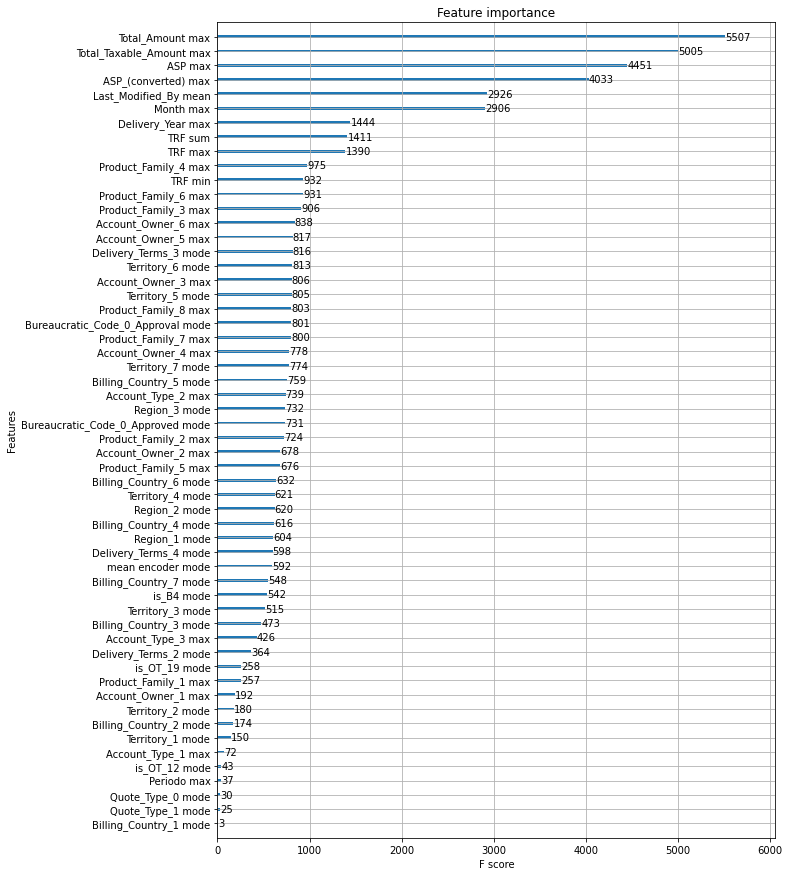

In [524]:
plt.rcParams['figure.figsize'] = (10, 15)
plot_importance(model, max_num_features = 800)

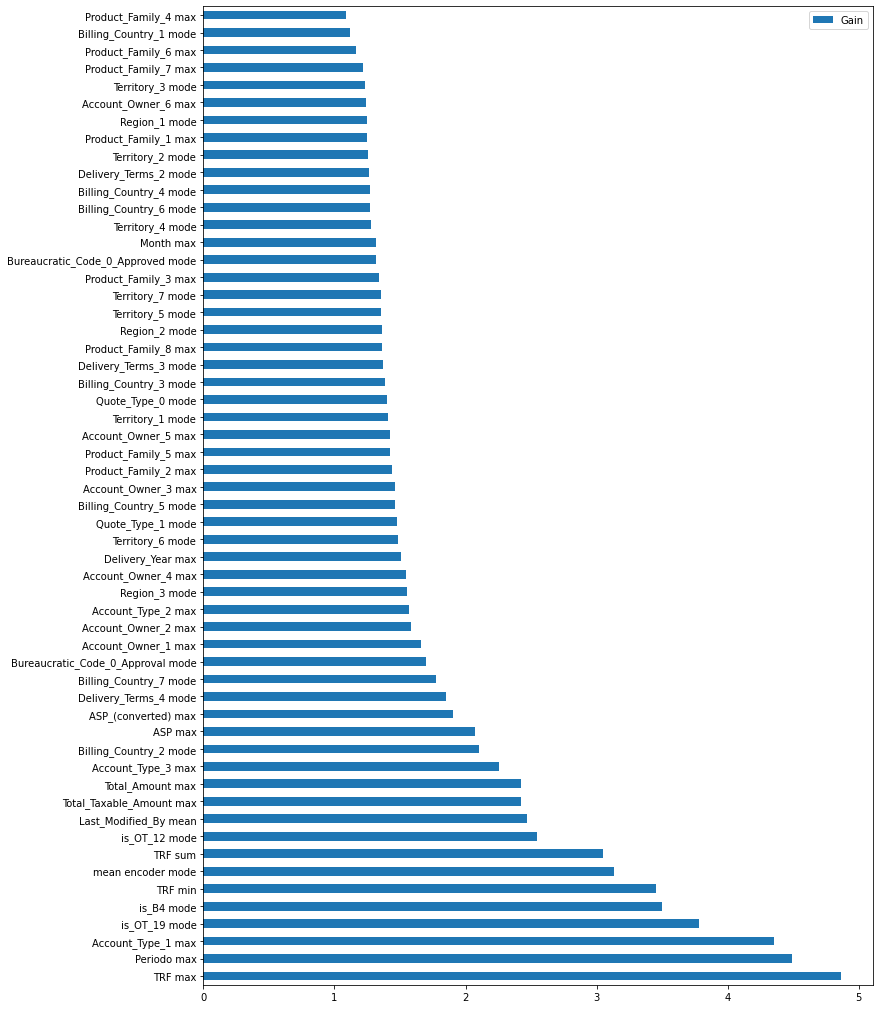

In [526]:
plt.rcParams['figure.figsize'] = (12, 18)
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["Gain"]).sort_values(by = "Gain", ascending=False)
data.plot(kind='barh')

# Tunning

### Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
 #   'n_estimators':range(1, 2002, 400),   
#'learning_rate':[0.01,0.02,0..4,0.1,0.2],
    'subsample':[0.1,0.15,0.2,0.25,0.3,0.35,0.4],
    'colsample_bytree':[0.1,0.15,0.2,0.25,0.3,0.35,0.4],
    #'max_depth':range(1,15,2)
  #  'min_child_weight' : range(1,10,1) 
}

search = GridSearchCV(
        estimator = XGBClassifier(n_estimators=1200,objective="binary:logistic",
                     max_depth= 7, min_child_weight = 2,learning_rate=0.015                     ),
        param_grid = param_test,
        n_jobs=-1,
        cv=5,
        verbose=10)


In [ ]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 37

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.015, max_delta_step=0,
                                     max_depth=7, min_child_weight=2,
                                     missing=None, n_estimators=1200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                              0.4],
                         'subsample': [0.1, 0

In [ ]:
search.best_params_, search.best_score_

({'colsample_bytree': 0.35, 'subsample': 0.4}, 0.8313335957703627)

In [ ]:
param_test = {
    'n_estimators':range(1, 1501, 50),   
#'learning_rate':[0.01,0.02,0..4,0.1,0.2],
#    'subsample':[0.1,0.15,0.2,0.25,0.3,0.35,0.4],
 #   'colsample_bytree':[0.1,0.15,0.2,0.25,0.3,0.35,0.4],
    #'max_depth':range(1,15,2)
  #  'min_child_weight' : range(1,10,1) 
}

search = GridSearchCV(
        estimator = XGBClassifier(objective="binary:logistic",
                     max_depth= 7, min_child_weight = 2,learning_rate=0.015, subsample=0.15,colsample_bytree=0.25                     ),
        param_grid = param_test,
        n_jobs=-1,
        cv=5,
        verbose=10)

In [ ]:

search.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 22

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.25, gamma=0,
                                     learning_rate=0.015, max_delta_step=0,
                                     max_depth=7, min_child_weight=2,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.15, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': range(1, 1501, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbos

In [ ]:
search.best_params_, search.best_score_

({'n_estimators': 1351}, 0.823801001009812)

# CATBOOST

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=2000)
model.fit(x_train, y_train)

Learning rate set to 0.013139
0:	learn: 0.6875178	total: 166ms	remaining: 5m 31s
1:	learn: 0.6829924	total: 173ms	remaining: 2m 52s
2:	learn: 0.6783114	total: 180ms	remaining: 1m 59s
3:	learn: 0.6733771	total: 187ms	remaining: 1m 33s
4:	learn: 0.6683338	total: 194ms	remaining: 1m 17s
5:	learn: 0.6631819	total: 202ms	remaining: 1m 7s
6:	learn: 0.6588410	total: 209ms	remaining: 59.6s
7:	learn: 0.6547192	total: 217ms	remaining: 54.1s
8:	learn: 0.6510268	total: 225ms	remaining: 49.8s
9:	learn: 0.6461233	total: 232ms	remaining: 46.2s
10:	learn: 0.6423246	total: 239ms	remaining: 43.2s
11:	learn: 0.6380032	total: 246ms	remaining: 40.7s
12:	learn: 0.6341998	total: 253ms	remaining: 38.6s
13:	learn: 0.6302009	total: 260ms	remaining: 36.9s
14:	learn: 0.6265428	total: 267ms	remaining: 35.3s
15:	learn: 0.6224855	total: 274ms	remaining: 34s
16:	learn: 0.6188638	total: 282ms	remaining: 32.9s
17:	learn: 0.6156062	total: 289ms	remaining: 31.8s
18:	learn: 0.6123389	total: 296ms	remaining: 30.8s
19:	lear

165:	learn: 0.4563011	total: 1.41s	remaining: 15.6s
166:	learn: 0.4559960	total: 1.42s	remaining: 15.5s
167:	learn: 0.4556926	total: 1.42s	remaining: 15.5s
168:	learn: 0.4554444	total: 1.43s	remaining: 15.5s
169:	learn: 0.4551331	total: 1.44s	remaining: 15.5s
170:	learn: 0.4548092	total: 1.45s	remaining: 15.5s
171:	learn: 0.4544695	total: 1.45s	remaining: 15.5s
172:	learn: 0.4542764	total: 1.46s	remaining: 15.4s
173:	learn: 0.4537745	total: 1.47s	remaining: 15.4s
174:	learn: 0.4534520	total: 1.48s	remaining: 15.4s
175:	learn: 0.4527639	total: 1.48s	remaining: 15.4s
176:	learn: 0.4525034	total: 1.49s	remaining: 15.4s
177:	learn: 0.4520965	total: 1.5s	remaining: 15.3s
178:	learn: 0.4517353	total: 1.51s	remaining: 15.3s
179:	learn: 0.4512311	total: 1.51s	remaining: 15.3s
180:	learn: 0.4508523	total: 1.52s	remaining: 15.3s
181:	learn: 0.4504822	total: 1.53s	remaining: 15.3s
182:	learn: 0.4500400	total: 1.53s	remaining: 15.2s
183:	learn: 0.4497960	total: 1.54s	remaining: 15.2s
184:	learn: 0

330:	learn: 0.4171137	total: 2.64s	remaining: 13.3s
331:	learn: 0.4167915	total: 2.65s	remaining: 13.3s
332:	learn: 0.4166823	total: 2.65s	remaining: 13.3s
333:	learn: 0.4164658	total: 2.66s	remaining: 13.3s
334:	learn: 0.4163336	total: 2.67s	remaining: 13.3s
335:	learn: 0.4161850	total: 2.68s	remaining: 13.3s
336:	learn: 0.4159734	total: 2.69s	remaining: 13.3s
337:	learn: 0.4157019	total: 2.69s	remaining: 13.2s
338:	learn: 0.4155915	total: 2.7s	remaining: 13.2s
339:	learn: 0.4154513	total: 2.71s	remaining: 13.2s
340:	learn: 0.4153420	total: 2.72s	remaining: 13.2s
341:	learn: 0.4152596	total: 2.73s	remaining: 13.2s
342:	learn: 0.4151359	total: 2.73s	remaining: 13.2s
343:	learn: 0.4148193	total: 2.74s	remaining: 13.2s
344:	learn: 0.4145905	total: 2.75s	remaining: 13.2s
345:	learn: 0.4144170	total: 2.76s	remaining: 13.2s
346:	learn: 0.4141914	total: 2.77s	remaining: 13.2s
347:	learn: 0.4138682	total: 2.77s	remaining: 13.2s
348:	learn: 0.4136859	total: 2.78s	remaining: 13.1s
349:	learn: 0

498:	learn: 0.3927421	total: 3.87s	remaining: 11.6s
499:	learn: 0.3926568	total: 3.88s	remaining: 11.6s
500:	learn: 0.3926073	total: 3.89s	remaining: 11.6s
501:	learn: 0.3925185	total: 3.89s	remaining: 11.6s
502:	learn: 0.3923319	total: 3.9s	remaining: 11.6s
503:	learn: 0.3921591	total: 3.91s	remaining: 11.6s
504:	learn: 0.3920978	total: 3.92s	remaining: 11.6s
505:	learn: 0.3919548	total: 3.92s	remaining: 11.6s
506:	learn: 0.3918431	total: 3.93s	remaining: 11.6s
507:	learn: 0.3917611	total: 3.94s	remaining: 11.6s
508:	learn: 0.3917231	total: 3.94s	remaining: 11.6s
509:	learn: 0.3916451	total: 3.95s	remaining: 11.5s
510:	learn: 0.3916063	total: 3.96s	remaining: 11.5s
511:	learn: 0.3913906	total: 3.96s	remaining: 11.5s
512:	learn: 0.3912904	total: 3.97s	remaining: 11.5s
513:	learn: 0.3912083	total: 3.98s	remaining: 11.5s
514:	learn: 0.3910083	total: 3.99s	remaining: 11.5s
515:	learn: 0.3908118	total: 4s	remaining: 11.5s
516:	learn: 0.3907068	total: 4s	remaining: 11.5s
517:	learn: 0.39062

664:	learn: 0.3746344	total: 5.1s	remaining: 10.2s
665:	learn: 0.3745295	total: 5.11s	remaining: 10.2s
666:	learn: 0.3743813	total: 5.11s	remaining: 10.2s
667:	learn: 0.3742827	total: 5.12s	remaining: 10.2s
668:	learn: 0.3741886	total: 5.13s	remaining: 10.2s
669:	learn: 0.3741279	total: 5.14s	remaining: 10.2s
670:	learn: 0.3740130	total: 5.14s	remaining: 10.2s
671:	learn: 0.3738929	total: 5.15s	remaining: 10.2s
672:	learn: 0.3738207	total: 5.16s	remaining: 10.2s
673:	learn: 0.3737023	total: 5.17s	remaining: 10.2s
674:	learn: 0.3736504	total: 5.17s	remaining: 10.2s
675:	learn: 0.3734982	total: 5.18s	remaining: 10.1s
676:	learn: 0.3734144	total: 5.19s	remaining: 10.1s
677:	learn: 0.3733982	total: 5.2s	remaining: 10.1s
678:	learn: 0.3732385	total: 5.2s	remaining: 10.1s
679:	learn: 0.3731907	total: 5.21s	remaining: 10.1s
680:	learn: 0.3730599	total: 5.22s	remaining: 10.1s
681:	learn: 0.3729829	total: 5.22s	remaining: 10.1s
682:	learn: 0.3728293	total: 5.23s	remaining: 10.1s
683:	learn: 0.3

831:	learn: 0.3557730	total: 6.33s	remaining: 8.89s
832:	learn: 0.3556957	total: 6.34s	remaining: 8.88s
833:	learn: 0.3555955	total: 6.35s	remaining: 8.87s
834:	learn: 0.3554910	total: 6.35s	remaining: 8.86s
835:	learn: 0.3552929	total: 6.36s	remaining: 8.86s
836:	learn: 0.3551704	total: 6.37s	remaining: 8.85s
837:	learn: 0.3550901	total: 6.38s	remaining: 8.84s
838:	learn: 0.3550142	total: 6.38s	remaining: 8.83s
839:	learn: 0.3548642	total: 6.39s	remaining: 8.82s
840:	learn: 0.3547572	total: 6.4s	remaining: 8.81s
841:	learn: 0.3546404	total: 6.4s	remaining: 8.81s
842:	learn: 0.3545845	total: 6.41s	remaining: 8.8s
843:	learn: 0.3544251	total: 6.42s	remaining: 8.79s
844:	learn: 0.3542702	total: 6.42s	remaining: 8.78s
845:	learn: 0.3541300	total: 6.43s	remaining: 8.77s
846:	learn: 0.3539885	total: 6.44s	remaining: 8.77s
847:	learn: 0.3537971	total: 6.45s	remaining: 8.76s
848:	learn: 0.3536911	total: 6.45s	remaining: 8.75s
849:	learn: 0.3535122	total: 6.46s	remaining: 8.74s
850:	learn: 0.3

995:	learn: 0.3387409	total: 7.56s	remaining: 7.62s
996:	learn: 0.3386515	total: 7.57s	remaining: 7.61s
997:	learn: 0.3385233	total: 7.58s	remaining: 7.61s
998:	learn: 0.3384330	total: 7.58s	remaining: 7.6s
999:	learn: 0.3383544	total: 7.59s	remaining: 7.59s
1000:	learn: 0.3383501	total: 7.6s	remaining: 7.58s
1001:	learn: 0.3382588	total: 7.61s	remaining: 7.58s
1002:	learn: 0.3381347	total: 7.61s	remaining: 7.57s
1003:	learn: 0.3381249	total: 7.62s	remaining: 7.56s
1004:	learn: 0.3379431	total: 7.63s	remaining: 7.55s
1005:	learn: 0.3378301	total: 7.63s	remaining: 7.54s
1006:	learn: 0.3377290	total: 7.64s	remaining: 7.54s
1007:	learn: 0.3376150	total: 7.65s	remaining: 7.53s
1008:	learn: 0.3374164	total: 7.66s	remaining: 7.52s
1009:	learn: 0.3373484	total: 7.66s	remaining: 7.51s
1010:	learn: 0.3372277	total: 7.67s	remaining: 7.5s
1011:	learn: 0.3371897	total: 7.68s	remaining: 7.5s
1012:	learn: 0.3371050	total: 7.68s	remaining: 7.49s
1013:	learn: 0.3369737	total: 7.69s	remaining: 7.48s
10

1160:	learn: 0.3238184	total: 8.79s	remaining: 6.35s
1161:	learn: 0.3237974	total: 8.79s	remaining: 6.34s
1162:	learn: 0.3237294	total: 8.8s	remaining: 6.33s
1163:	learn: 0.3236032	total: 8.81s	remaining: 6.33s
1164:	learn: 0.3234546	total: 8.82s	remaining: 6.32s
1165:	learn: 0.3234181	total: 8.82s	remaining: 6.31s
1166:	learn: 0.3234103	total: 8.83s	remaining: 6.3s
1167:	learn: 0.3233326	total: 8.84s	remaining: 6.3s
1168:	learn: 0.3232077	total: 8.85s	remaining: 6.29s
1169:	learn: 0.3232022	total: 8.85s	remaining: 6.28s
1170:	learn: 0.3231218	total: 8.86s	remaining: 6.27s
1171:	learn: 0.3230211	total: 8.87s	remaining: 6.26s
1172:	learn: 0.3229144	total: 8.87s	remaining: 6.26s
1173:	learn: 0.3227906	total: 8.88s	remaining: 6.25s
1174:	learn: 0.3226903	total: 8.89s	remaining: 6.24s
1175:	learn: 0.3226840	total: 8.9s	remaining: 6.23s
1176:	learn: 0.3226603	total: 8.9s	remaining: 6.22s
1177:	learn: 0.3225864	total: 8.91s	remaining: 6.22s
1178:	learn: 0.3225312	total: 8.92s	remaining: 6.21

1327:	learn: 0.3123195	total: 10s	remaining: 5.07s
1328:	learn: 0.3122276	total: 10s	remaining: 5.06s
1329:	learn: 0.3121566	total: 10s	remaining: 5.06s
1330:	learn: 0.3121365	total: 10s	remaining: 5.05s
1331:	learn: 0.3120254	total: 10.1s	remaining: 5.04s
1332:	learn: 0.3119621	total: 10.1s	remaining: 5.03s
1333:	learn: 0.3119195	total: 10.1s	remaining: 5.03s
1334:	learn: 0.3118673	total: 10.1s	remaining: 5.02s
1335:	learn: 0.3117921	total: 10.1s	remaining: 5.01s
1336:	learn: 0.3117147	total: 10.1s	remaining: 5s
1337:	learn: 0.3117121	total: 10.1s	remaining: 5s
1338:	learn: 0.3116802	total: 10.1s	remaining: 4.99s
1339:	learn: 0.3116634	total: 10.1s	remaining: 4.98s
1340:	learn: 0.3116538	total: 10.1s	remaining: 4.97s
1341:	learn: 0.3115689	total: 10.1s	remaining: 4.96s
1342:	learn: 0.3114918	total: 10.1s	remaining: 4.96s
1343:	learn: 0.3113975	total: 10.1s	remaining: 4.95s
1344:	learn: 0.3113267	total: 10.1s	remaining: 4.94s
1345:	learn: 0.3112529	total: 10.2s	remaining: 4.93s
1346:	l

1492:	learn: 0.3021719	total: 11.3s	remaining: 3.82s
1493:	learn: 0.3020801	total: 11.3s	remaining: 3.81s
1494:	learn: 0.3019821	total: 11.3s	remaining: 3.81s
1495:	learn: 0.3018835	total: 11.3s	remaining: 3.8s
1496:	learn: 0.3018388	total: 11.3s	remaining: 3.79s
1497:	learn: 0.3017722	total: 11.3s	remaining: 3.78s
1498:	learn: 0.3016755	total: 11.3s	remaining: 3.77s
1499:	learn: 0.3016385	total: 11.3s	remaining: 3.77s
1500:	learn: 0.3015761	total: 11.3s	remaining: 3.76s
1501:	learn: 0.3014788	total: 11.3s	remaining: 3.75s
1502:	learn: 0.3014174	total: 11.3s	remaining: 3.74s
1503:	learn: 0.3014047	total: 11.3s	remaining: 3.74s
1504:	learn: 0.3013970	total: 11.3s	remaining: 3.73s
1505:	learn: 0.3013340	total: 11.3s	remaining: 3.72s
1506:	learn: 0.3012670	total: 11.4s	remaining: 3.71s
1507:	learn: 0.3011838	total: 11.4s	remaining: 3.71s
1508:	learn: 0.3011373	total: 11.4s	remaining: 3.7s
1509:	learn: 0.3010193	total: 11.4s	remaining: 3.69s
1510:	learn: 0.3009662	total: 11.4s	remaining: 3

1660:	learn: 0.2927968	total: 12.5s	remaining: 2.55s
1661:	learn: 0.2927314	total: 12.5s	remaining: 2.54s
1662:	learn: 0.2927114	total: 12.5s	remaining: 2.53s
1663:	learn: 0.2926632	total: 12.5s	remaining: 2.52s
1664:	learn: 0.2926311	total: 12.5s	remaining: 2.52s
1665:	learn: 0.2925597	total: 12.5s	remaining: 2.51s
1666:	learn: 0.2925560	total: 12.5s	remaining: 2.5s
1667:	learn: 0.2924945	total: 12.5s	remaining: 2.49s
1668:	learn: 0.2924279	total: 12.5s	remaining: 2.49s
1669:	learn: 0.2923570	total: 12.5s	remaining: 2.48s
1670:	learn: 0.2923113	total: 12.6s	remaining: 2.47s
1671:	learn: 0.2922647	total: 12.6s	remaining: 2.46s
1672:	learn: 0.2922246	total: 12.6s	remaining: 2.46s
1673:	learn: 0.2921995	total: 12.6s	remaining: 2.45s
1674:	learn: 0.2921474	total: 12.6s	remaining: 2.44s
1675:	learn: 0.2921338	total: 12.6s	remaining: 2.43s
1676:	learn: 0.2920711	total: 12.6s	remaining: 2.43s
1677:	learn: 0.2919893	total: 12.6s	remaining: 2.42s
1678:	learn: 0.2919555	total: 12.6s	remaining: 

1826:	learn: 0.2840843	total: 13.7s	remaining: 1.3s
1827:	learn: 0.2840332	total: 13.7s	remaining: 1.29s
1828:	learn: 0.2839848	total: 13.7s	remaining: 1.28s
1829:	learn: 0.2839813	total: 13.7s	remaining: 1.28s
1830:	learn: 0.2839264	total: 13.7s	remaining: 1.27s
1831:	learn: 0.2838512	total: 13.8s	remaining: 1.26s
1832:	learn: 0.2838453	total: 13.8s	remaining: 1.25s
1833:	learn: 0.2838189	total: 13.8s	remaining: 1.25s
1834:	learn: 0.2837327	total: 13.8s	remaining: 1.24s
1835:	learn: 0.2836528	total: 13.8s	remaining: 1.23s
1836:	learn: 0.2836304	total: 13.8s	remaining: 1.22s
1837:	learn: 0.2835583	total: 13.8s	remaining: 1.22s
1838:	learn: 0.2834562	total: 13.8s	remaining: 1.21s
1839:	learn: 0.2833827	total: 13.8s	remaining: 1.2s
1840:	learn: 0.2833804	total: 13.8s	remaining: 1.19s
1841:	learn: 0.2832914	total: 13.8s	remaining: 1.19s
1842:	learn: 0.2832654	total: 13.8s	remaining: 1.18s
1843:	learn: 0.2832151	total: 13.8s	remaining: 1.17s
1844:	learn: 0.2831875	total: 13.8s	remaining: 1

1992:	learn: 0.2756154	total: 14.9s	remaining: 52.5ms
1993:	learn: 0.2755761	total: 14.9s	remaining: 45ms
1994:	learn: 0.2755378	total: 15s	remaining: 37.5ms
1995:	learn: 0.2755342	total: 15s	remaining: 30ms
1996:	learn: 0.2754851	total: 15s	remaining: 22.5ms
1997:	learn: 0.2754402	total: 15s	remaining: 15ms
1998:	learn: 0.2754009	total: 15s	remaining: 7.5ms
1999:	learn: 0.2753207	total: 15s	remaining: 0us


# Test

In [ ]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 89.6450%
Testeo: 81.9296%.
log_loss 0.39597526997014343


# Predecir Proba

In [ ]:
predict = model.predict_proba(to_predict)
predict


array([[0.22556955, 0.77443045],
       [0.48823774, 0.51176226],
       [0.30800056, 0.69199944],
       ...,
       [0.8052531 , 0.1947469 ],
       [0.54573655, 0.45426345],
       [0.92214924, 0.07785074]], dtype=float32)

In [ ]:
proba = pd.DataFrame(data=predict, columns=["0", "1"])
proba

,0,1
0,0.225570,0.774430
1,0.488238,0.511762
2,0.308001,0.691999
3,0.764446,0.235554
4,0.033526,0.966474
...,...,...
1562,0.220103,0.779897
1563,0.596957,0.403043
1564,0.805253,0.194747
1565,0.545737,0.454263


In [ ]:
result = submission_output(id_, proba["1"],"Catboost_2000iteration.csv")
result

,Opportunity_ID,Target
0,10689,0.643552
1,10690,0.375631
2,10691,0.842184
3,10692,0.296533
4,10693,0.943564
...,...,...
1562,12364,0.595049
1563,12365,0.300610
1564,12366,0.119389
1565,12367,0.164428
